In [1]:
# Load libraries
import pandas as pd
import numpy as np

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


## 1.Load and check dataframe 

In [2]:
data =pd.read_excel("depression.xlsx")
data = data.drop(columns=['Unnamed: 0'])
data.head()

,depression,maritalStatus_Married,MentalIllnesspast_depression,ageAtAdmissiongroup,occupation_Student,employmentStatus_Self-employed,Male,employmentStatus_Employed,psychoactiveSubType_Marijuana,fatherDeceased,...,chronicIllness_High Blood Pressure,useOfMobile,highestEdu,motherDeceased,occupation_Service and sales workers,presentLiving_Civil partner,occupation_Managers and Professionals,forensicIssue_Arrests,suicideType_Fatalistic suicide,chronicIllness_Diabetes
0,0,0,0,4,0,0,1,1,0,0,...,0,4,3,0,0,0,1,1,0,0
1,0,1,0,4,0,0,1,1,0,0,...,0,2,4,0,0,0,1,1,0,0
2,1,0,0,2,0,0,1,0,0,0,...,0,3,2,0,0,0,0,0,0,0
3,0,0,0,4,0,0,1,1,1,1,...,0,3,1,1,0,1,1,0,0,0
4,1,1,0,4,0,1,1,0,0,0,...,0,3,1,0,0,1,1,0,0,0


In [3]:
#Load all selected features
for col in data.columns: 
    print(col) 

depression
maritalStatus_Married
MentalIllnesspast_depression
ageAtAdmissiongroup
occupation_Student
employmentStatus_Self-employed
Male
employmentStatus_Employed
psychoactiveSubType_Marijuana
fatherDeceased
suicideType_Egoistic suicide
chronicIllness_High Blood Pressure
useOfMobile
highestEdu
motherDeceased
occupation_Service and sales workers
presentLiving_Civil partner 
occupation_Managers and Professionals
forensicIssue_Arrests
suicideType_Fatalistic suicide
chronicIllness_Diabetes


## 2. Split data into test and train and test the models

LR: 0.823569 (0.004194)
KNN: 0.795654 (0.007907)
CART: 0.781223 (0.011356)
NB: 0.800744 (0.010533)
SVM: 0.823707 (0.001857)


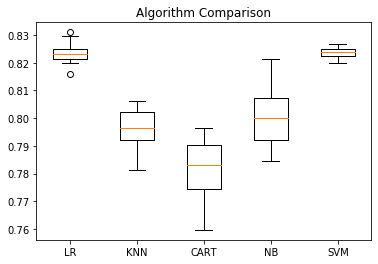

In [4]:
from sklearn.model_selection import train_test_split

#Split data into train and test
X = data.drop(columns=['depression'],axis=1)
y = data["depression"]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)


# # prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))



# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

    
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

## 3.Tunning The Model’s Hyperparameters

In [5]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


#features and label
features = data.drop(columns=['depression'])
labels = data['depression']

In [6]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [7]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10,100]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(features, labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 1, 'kernel': 'rbf'}

0.823 (+/-0.01) for {'C': 0.1, 'kernel': 'linear'}
0.818 (+/-0.0) for {'C': 0.1, 'kernel': 'rbf'}
0.823 (+/-0.011) for {'C': 1, 'kernel': 'linear'}
0.824 (+/-0.008) for {'C': 1, 'kernel': 'rbf'}
0.823 (+/-0.011) for {'C': 10, 'kernel': 'linear'}
0.823 (+/-0.011) for {'C': 10, 'kernel': 'rbf'}
0.823 (+/-0.011) for {'C': 100, 'kernel': 'linear'}
0.822 (+/-0.01) for {'C': 100, 'kernel': 'rbf'}


In [8]:
SVM1 = cv.best_estimator_

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('depression', axis=1),
                                                   data['depression'], test_size=0.20,
                                                   random_state=200)

In [10]:
joblib.dump(cv.best_estimator_, 'SVM_model1.pkl')

['SVM_model1.pkl']

In [11]:
#Train the model
SVM1.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [12]:
# Make predictions
y_pred = SVM1.predict(X_test)

In [13]:
import numpy as np
np.set_printoptions(threshold=np.inf)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## 4. Evaluation

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90      1493
           1       0.87      0.04      0.08       325

    accuracy                           0.83      1818
   macro avg       0.85      0.52      0.49      1818
weighted avg       0.83      0.83      0.76      1818



In [15]:
confusion_matrix(y_test, y_pred)

array([[1491,    2],
       [ 312,   13]], dtype=int64)

In [16]:
print ("True:" , y_test.values[0:25])
print ("Pred:", y_pred[0:25])

True: [0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0]
Pred: [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:

precision_score(y_test, y_pred)

0.8666666666666667

In [18]:
accuracy_score(y_test, y_pred)

0.8272827282728272

In [19]:
data['depression'].value_counts()

0    7440
1    1650
Name: depression, dtype: int64